Reference for how to install R packages [here](https://towardsdatascience.com/how-to-install-packages-in-r-google-colab-423e8928cd2e).

This is from [this](https://www.r-bloggers.com/2015/10/modelling-dependence-with-copulas-in-r/) r-bloggers post.

In [ ]:
system('sudo apt-get install -y libgsl0-dev', intern=TRUE)
install.packages('copula')
library(copula)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gsl’, ‘ADGofTest’, ‘stabledist’, ‘mvtnorm’, ‘pcaPP’, ‘pspline’, ‘numDeriv’




In [ ]:
install.packages('evir')
library('evir')
install.packages('quantmod')
library('quantmod')
install.packages('VineCopula')
library('VineCopula')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘VineCopula’


The following object is masked from ‘package:copula’:

    pobs




In [ ]:
cree <- read.csv("https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/cree", header=F)$V1
yahoo <- read.csv("https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/yahoo", header=F)$V1
str(cree)

 num [1:3965] -0.02479 -0.00993 -0.02126 -0.02213 0.01551 ...


[1] 0.4023581

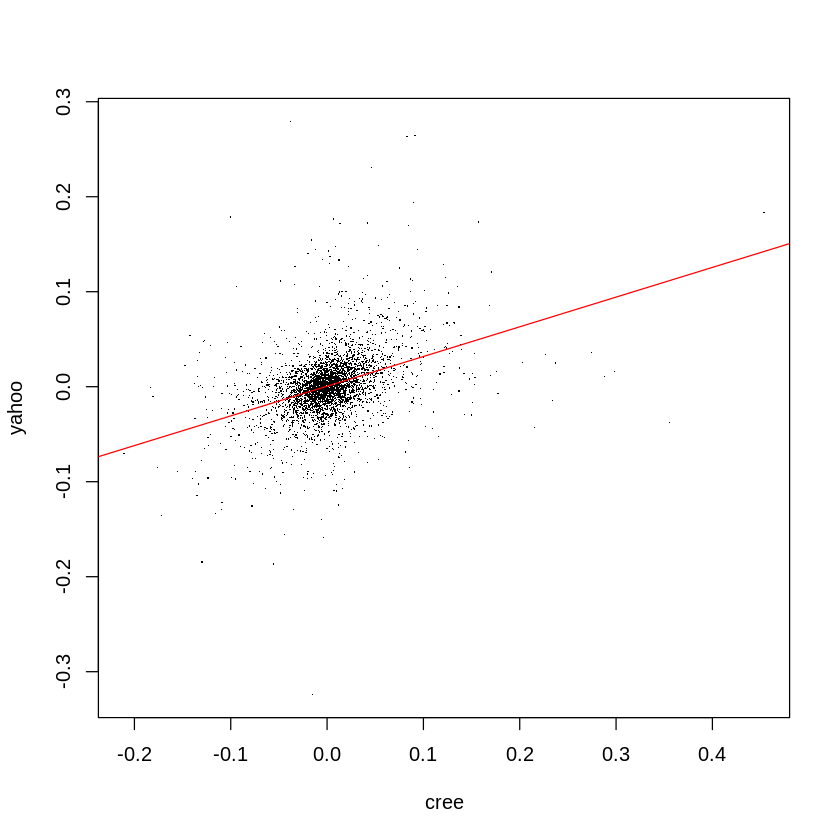

In [ ]:
plot(cree, yahoo,pch='.')
abline(lm(yahoo ~ cree), col='red', lwd=1)
cor(cree, yahoo, method='spearman')

In [ ]:
u <- pobs(as.matrix(cbind(cree,yahoo)))[,1]
v <- pobs(as.matrix(cbind(cree,yahoo)))[,2]
selectedCopula <- BiCopSelect(u, v, familyset=NA)
selectedCopula

Bivariate copula: t (par = 0.44, par2 = 3.84, tau = 0.29) 

 If familyset = NA (default), selection among all possible families is performed. If a vector of negative numbers is provided, selection among all but abs(familyset) families is performed. Coding of bivariate copula families: 0 = independence copula 1 = Gaussian copula 2 = Student t copula (t-copula) 3 = Clayton copula 4 = Gumbel copula 5 = Frank copula 6 = Joe copula

In [ ]:
selectedCopula$family
selectedCopula$par
selectedCopula$par2

[1] 2

[1] 0.4356301

[1] 3.844514

par is the correlation rho

par2 is the df of the t distribution

In [ ]:
t.cop <- tCopula(dim=2)
# df	integer value specifying the number of degrees of freedom of the multivariate t distribution used to construct the t copulas.
# dim	the dimension of the copula.
t.cop

t-copula, dim. d = 2 
Dimension:  2 
Parameters:
  rho.1   = NA
  df      =  4

In [ ]:
set.seed(500)
m <- pobs(as.matrix(cbind(cree,yahoo)))
fit <- fitCopula(t.cop, m, method='ml')
coef(fit)
(rho <- coef(fit)[1])
(df <- coef(fit)[2])

rho.1        df 
0.4356298 3.8445147

rho.1 
0.4356298

df 
3.844515

In [ ]:
tCopula(dim=2, rho, df=df)

t-copula, dim. d = 2 
Dimension:  2 
Parameters:
  rho.1   = 0.4356298
  df      = 3.8445147

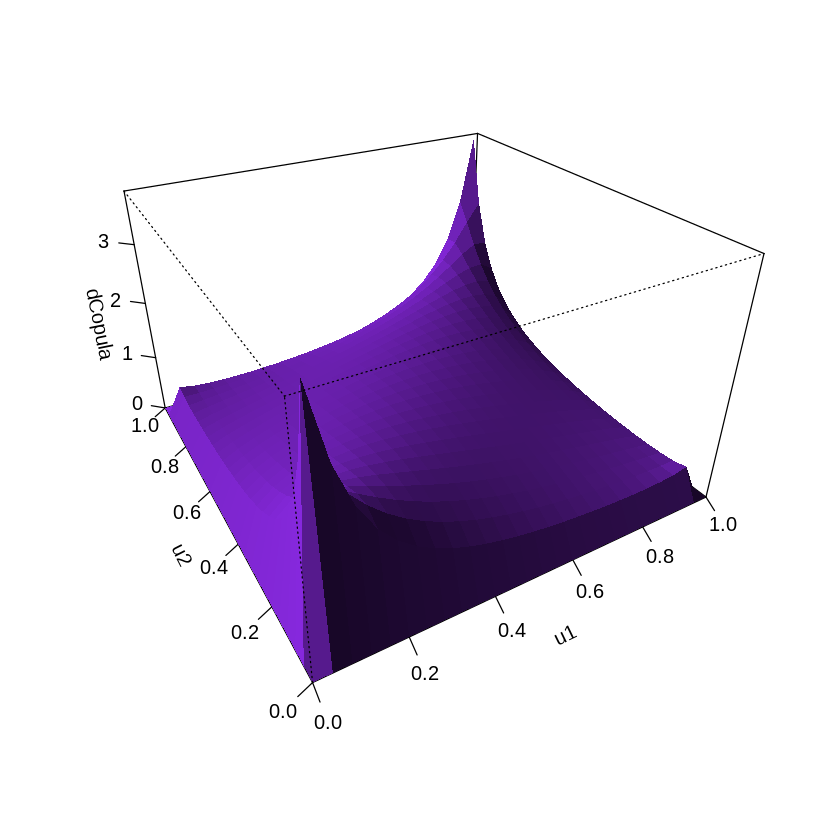

In [ ]:
persp(tCopula(dim=2, rho, df=df), dCopula, border=NA, shade=.75, col='purple2')

Sampling from the copula:

1.0000000,0.3839495
0.3839495,1.0000000


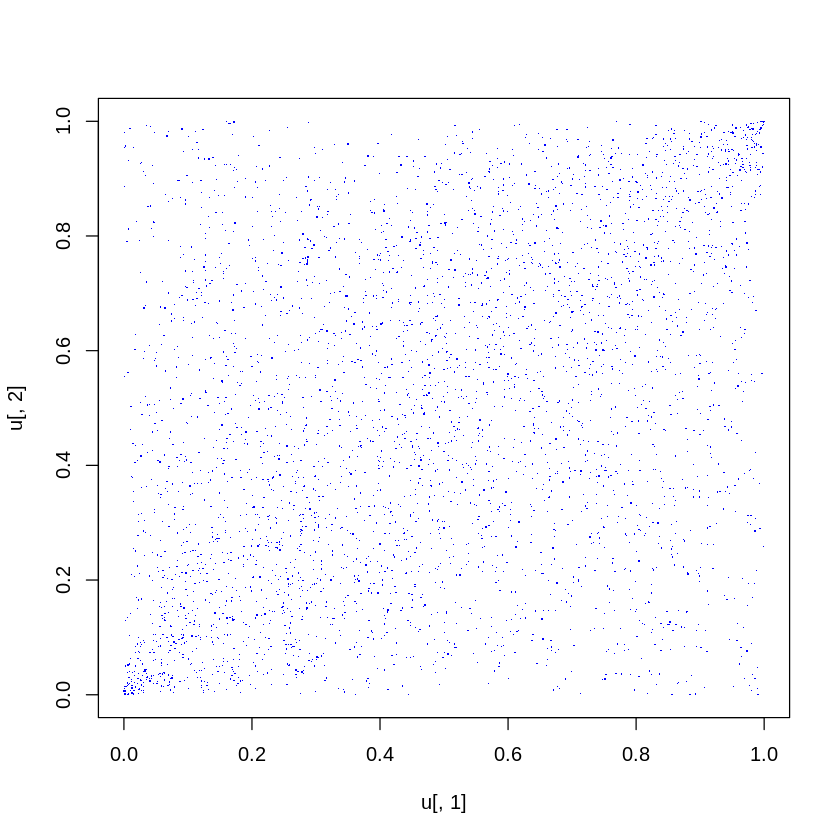

In [ ]:
u <- rCopula(nrow(m) , tCopula(dim=2, rho, df=df))
plot(u[,1], u[,2],pch='.',col='blue')
cor(u, method='spearman')

Note that the generated samples have the same correlation as the data.
The t-copula emphasizes extreme results: it is usually good for modelling phenomena where there is high correlation in the extreme values (the tails of the distribution):

In [ ]:
cor(cbind(cree, yahoo), method='spearman')

,cree,yahoo
cree,1.0000000,0.4023581
yahoo,0.4023581,1.0000000


Modelling the marginals. We are going to assume normally distributed returns for simplicity even though it is well known to be a far from sound assumption. We therefore estimate the parameters of the marginals

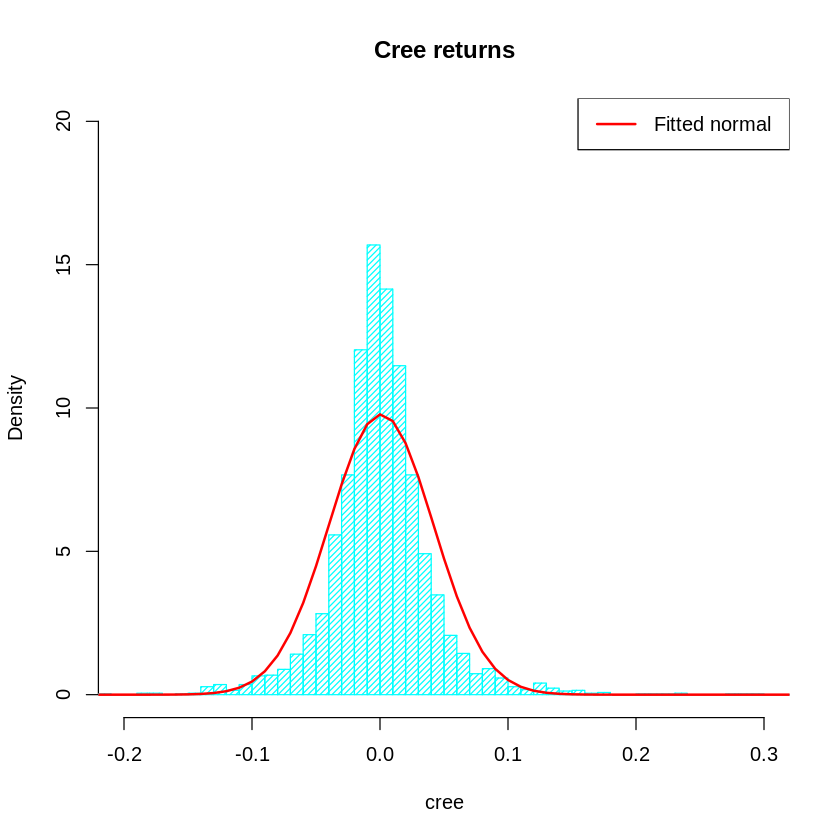

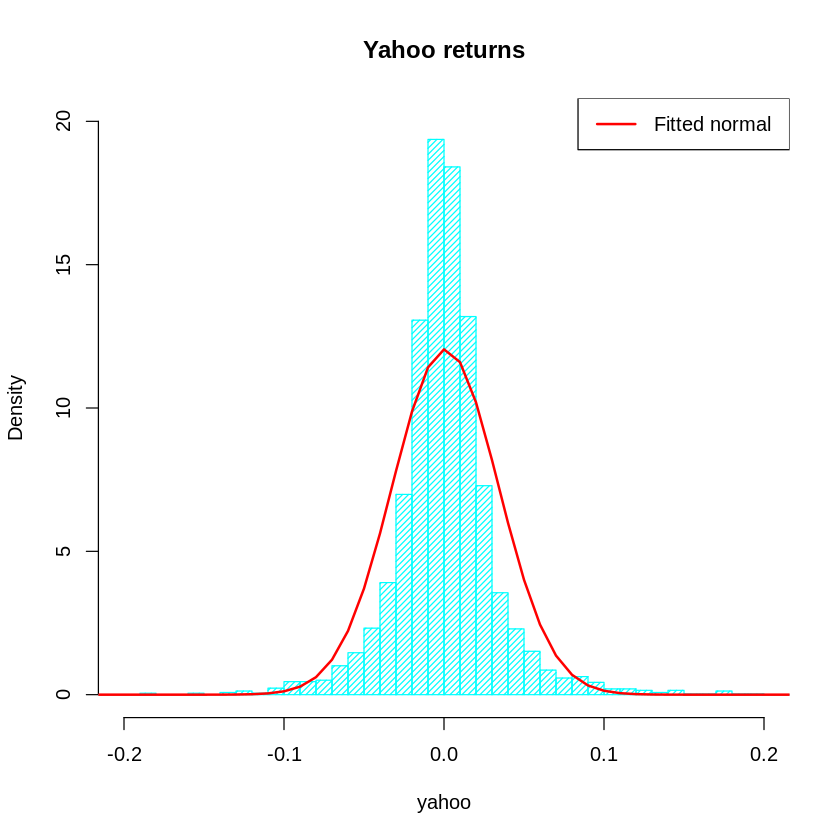

In [ ]:
cree_mu <- mean(cree)
cree_sd <- sd(cree)
yahoo_mu <- mean(yahoo)
yahoo_sd <- sd(yahoo)

hist(cree, breaks=80, main='Cree returns',freq=F,density=30,col='cyan',ylim=c(0,20),xlim=c(-0.2,0.3))
lines(seq(-0.5,0.5,0.01),dnorm(seq(-0.5,0.5,0.01), cree_mu, cree_sd),col='red',lwd=2)
legend('topright',c('Fitted normal'),col=c('red'),lwd=2)
hist(yahoo,breaks=80,main='Yahoo returns',density=30,col='cyan',freq=F,ylim=c(0,20),xlim=c(-0.2,0.2))
lines(seq(-0.5,0.5,0.01),dnorm(seq(-0.5,0.5,0.01),yahoo_mu,yahoo_sd),col='red',lwd=2)
legend('topright',c('Fitted normal'),col=c('red'),lwd=2)
